**"I (We) certify that the code and data in this assignment were generated independently,using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."**

**PART1**

In [2]:
# reading titanic data set

import tensorflow as tf
from tensorflow import keras
keras.optimizers.Adam
import numpy as np #Mathematics Library
import pandas as pd #Data-handling Library
import matplotlib.pyplot as plt #Used to graph our results
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import io


In [3]:

df = pd.read_csv("income_dataset (1).csv")

# Dataset is now stored in a Pandas Dataframe 


**Given Below is the heat map which represents the coorelation between numerical variables in our dataset as we can observe fnlwgt has very less correlation so it can be removed and its if this varible has multicorrenaity, then we can also find if they are the positively or negatively correcleted with each other**

<AxesSubplot:>

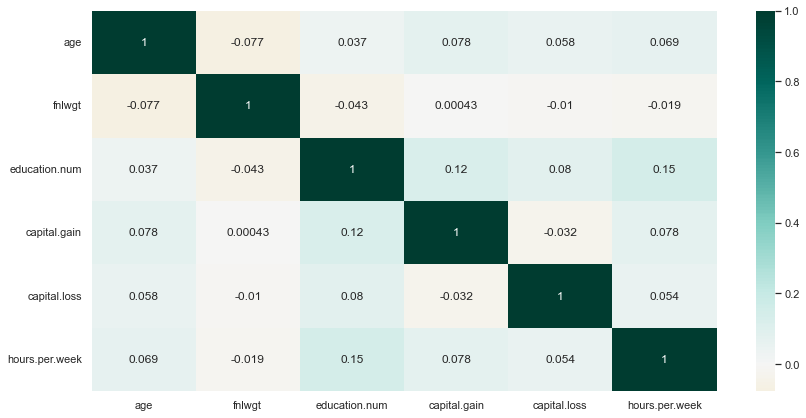

In [4]:
sns.set(rc = {'figure.figsize':(14,7)})
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

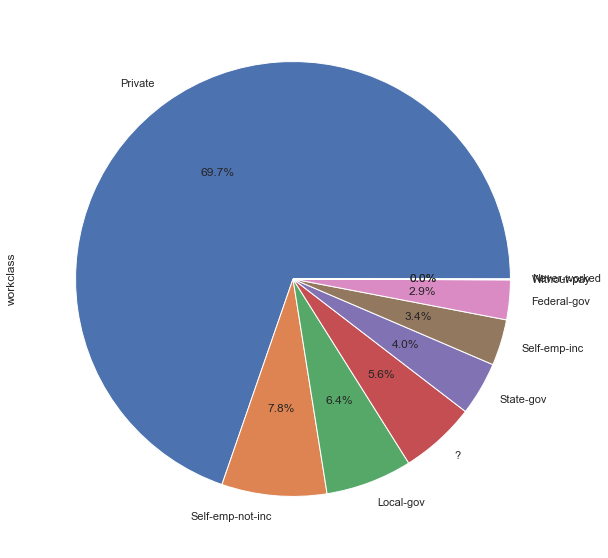

In [5]:
plt.figure(figsize=(10,10))
x = df['workclass'].value_counts().plot(kind='pie',autopct='%1.1f%%')

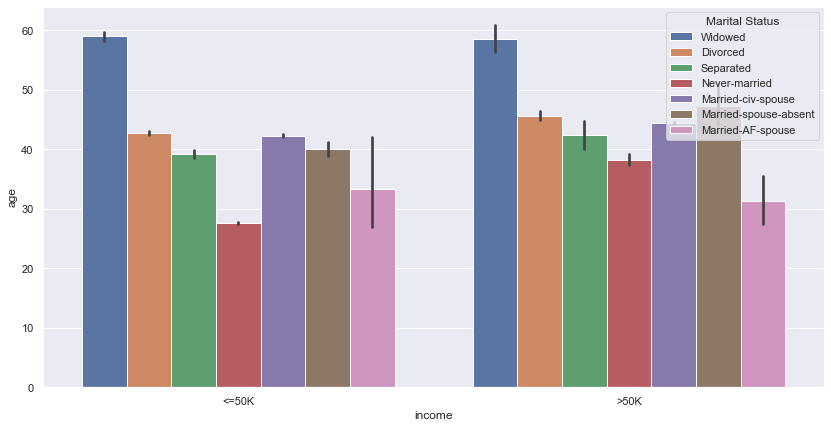

In [6]:
sns.barplot(x="income", y="age", hue="marital.status",data=df)
plt.legend(loc='upper right', title='Marital Status')

In [7]:
#getting min,max,mean,std etc of the data set
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256000e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897801e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055511e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178242e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


In [9]:
df.shape

(32561, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32560 non-null  float64
 3   education       32561 non-null  object 
 4   education.num   32561 non-null  int64  
 5   marital.status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   capital.gain    32561 non-null  int64  
 9   capital.loss    32561 non-null  int64  
 10  hours.per.week  32561 non-null  int64  
 11  native.country  32561 non-null  object 
 12  income          32561 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 3.2+ MB


In [11]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [12]:
df.dtypes

age                 int64
workclass          object
fnlwgt            float64
education          object
education.num       int64
marital.status     object
occupation         object
relationship       object
capital.gain        int64
capital.loss        int64
hours.per.week      int64
native.country     object
income             object
dtype: object

In [13]:
# Perform data preprocessing:
# a. Calculate the sum of missing entries in the dataset
df.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            1
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [14]:
#df = df.dropna(axis=0)
del df['fnlwgt']

for col in ['workclass','occupation','native.country']:
    df[col]=df[col].str.replace("?",df[col].mode()[0])

C:\Users\tejas\AppData\Local\Temp/ipykernel_21784/3604543415.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col]=df[col].str.replace("?",df[col].mode()[0])


In [15]:
df.isnull().sum(axis=0)

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [16]:
df.shape

(32561, 12)

In [17]:
from sklearn.preprocessing import LabelEncoder
edu=df["education"]
arredu=np.array(edu)
label_encoder = LabelEncoder()
edu_vec = label_encoder.fit_transform(arredu)

In [18]:
df["education"]=tf.keras.utils.to_categorical(edu_vec)
df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['native.country'] = label_encoder.fit_transform(df['native.country'])
df['marital.status'] = label_encoder.fit_transform(df['marital.status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['income'] = label_encoder.fit_transform(df['income'])

In [19]:

df.head(10)

,age,workclass,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,0.0,9,6,9,1,0,4356,40,38,0
1,82,3,0.0,9,6,3,1,0,4356,18,38,0
2,66,3,0.0,10,6,9,4,0,4356,40,38,0
3,54,3,0.0,4,0,6,4,0,3900,40,38,0
4,41,3,0.0,10,5,9,3,0,3900,40,38,0
5,34,3,0.0,9,0,7,4,0,3770,45,38,0
6,38,3,1.0,6,5,0,4,0,3770,40,38,0
7,74,6,0.0,16,4,9,2,0,3683,20,38,1
8,68,0,0.0,9,0,9,1,0,3683,40,38,0
9,41,3,0.0,10,4,2,4,0,3004,60,38,1


**Now Build NN Model**

**3 layers 8 nos of neurons activation funcrion relu nos of col except target=13**
** optimizer is adma its like gradient desent**

In [20]:
X = df.loc[:, df.columns != 'income']
Y = df['income']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(26048, 11)
(6513, 11)
(26048,)
(6513,)


In [22]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation='relu', input_shape=(11,)))
model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss='mse',metrics=['accuracy'])

In [23]:
histmodel = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
814/814 [==============================] - 2s 2ms/step - loss: 0.1497 - accuracy: 0.7839 - val_loss: 0.1354 - val_accuracy: 0.8012
Epoch 2/100
814/814 [==============================] - 1s 2ms/step - loss: 0.1383 - accuracy: 0.7962 - val_loss: 0.1335 - val_accuracy: 0.7972
Epoch 3/100
814/814 [==============================] - 1s 1ms/step - loss: 0.1363 - accuracy: 0.7978 - val_loss: 0.1403 - val_accuracy: 0.7774
Epoch 4/100
814/814 [==============================] - 1s 1ms/step - loss: 0.1324 - accuracy: 0.8021 - val_loss: 0.1288 - val_accuracy: 0.7834
Epoch 5/100
814/814 [==============================] - 1s 1ms/step - loss: 0.1302 - accuracy: 0.8027 - val_loss: 0.1363 - val_accuracy: 0.7943
Epoch 6/100
814/814 [==============================] - 1s 1ms/step - loss: 0.1303 - accuracy: 0.8049 - val_loss: 0.1365 - val_accuracy: 0.8013
Epoch 7/100
814/814 [==============================] - 1s 1ms/step - loss: 0.1298 - accuracy: 0.8037 - val_loss: 0.1444 - val_accuracy: 0.7890

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                360       
                                                                 
 dense_1 (Dense)             (None, 100)               3100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.optimizers import SGD
model1 = keras.models.Sequential()
model1.add(keras.layers.Dense(30, activation='elu', input_shape=(11,), kernel_initializer='random_uniform'))
model1.add(keras.layers.Dense(75, activation='elu', kernel_initializer='random_uniform'))
model1.add(keras.layers.Dense(75, activation='sigmoid', kernel_initializer='random_uniform'))
model1.add(keras.layers.Dropout(0.3))
model1.add(keras.layers.Dense(1))

opt = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])


In [26]:
historym1=model1.fit(X_train, Y_train, epochs=100, callbacks=[keras.callbacks.EarlyStopping(patience=5)], validation_data=(X_test, Y_test))

Epoch 1/100
814/814 [==============================] - 5s 4ms/step - loss: 2.5754 - accuracy: 0.7273 - val_loss: 2.9619 - val_accuracy: 0.7900
Epoch 2/100
814/814 [==============================] - 3s 4ms/step - loss: 2.8405 - accuracy: 0.7217 - val_loss: 2.7056 - val_accuracy: 0.7568
Epoch 3/100
814/814 [==============================] - 3s 3ms/step - loss: 2.6567 - accuracy: 0.7132 - val_loss: 7.9801 - val_accuracy: 0.2251
Epoch 4/100
814/814 [==============================] - 3s 3ms/step - loss: 4.7494 - accuracy: 0.5974 - val_loss: 2.6990 - val_accuracy: 0.7579
Epoch 5/100
814/814 [==============================] - 3s 3ms/step - loss: 2.6645 - accuracy: 0.7099 - val_loss: 0.5356 - val_accuracy: 0.7772
Epoch 6/100
814/814 [==============================] - 3s 4ms/step - loss: 2.6832 - accuracy: 0.6694 - val_loss: 2.6877 - val_accuracy: 0.7548
Epoch 7/100
814/814 [==============================] - 3s 4ms/step - loss: 2.6188 - accuracy: 0.6574 - val_loss: 2.7089 - val_accuracy: 0.7568

In [27]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                360       
                                                                 
 dense_4 (Dense)             (None, 75)                2325      
                                                                 
 dense_5 (Dense)             (None, 75)                5700      
                                                                 
 dropout (Dropout)           (None, 75)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 76        
                                                                 
Total params: 8,461
Trainable params: 8,461
Non-trainable params: 0
_________________________________________________________________


In [28]:

model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(30, activation='relu', kernel_initializer='uniform', input_shape=(11,)))
model2.add(keras.layers.Dense(75, activation='relu', kernel_initializer='uniform'))
model2.add(keras.layers.Dense(75, activation='sigmoid', kernel_initializer='uniform'))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(1))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
histmodel2 = model2.fit(X_train, Y_train, epochs=100, callbacks=[keras.callbacks.EarlyStopping(patience=5)], validation_data=(X_test, Y_test))

Epoch 1/100
814/814 [==============================] - 4s 4ms/step - loss: 3.5891 - accuracy: 0.5016 - val_loss: 0.5683 - val_accuracy: 0.7906
Epoch 2/100
814/814 [==============================] - 3s 3ms/step - loss: 2.0712 - accuracy: 0.6354 - val_loss: 0.6262 - val_accuracy: 0.7964
Epoch 3/100
814/814 [==============================] - 3s 4ms/step - loss: 1.9588 - accuracy: 0.6605 - val_loss: 0.9861 - val_accuracy: 0.7949
Epoch 4/100
814/814 [==============================] - 3s 4ms/step - loss: 2.1267 - accuracy: 0.6576 - val_loss: 0.9364 - val_accuracy: 0.7992
Epoch 5/100
814/814 [==============================] - 3s 4ms/step - loss: 1.9290 - accuracy: 0.6848 - val_loss: 0.8645 - val_accuracy: 0.7973
Epoch 6/100
814/814 [==============================] - 3s 4ms/step - loss: 1.9551 - accuracy: 0.7222 - val_loss: 1.4345 - val_accuracy: 0.7989


In [30]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 30)                360       
                                                                 
 dense_8 (Dense)             (None, 75)                2325      
                                                                 
 dense_9 (Dense)             (None, 75)                5700      
                                                                 
 dropout_1 (Dropout)         (None, 75)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 76        
                                                                 
Total params: 8,461
Trainable params: 8,461
Non-trainable params: 0
_________________________________________________________________


In [31]:
y_pred = model.predict(X_test)
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

In [32]:
y_pred = [1 if i > 0.5 else 0 for i in y_pred ]
print("Test Accuracy of model 1")
np.sum(np.equal(Y_test,y_pred))/(len(Y_test))

Test Accuracy of model 1


0.7896514662981728

In [33]:
y_pred1 = [1 if i > 0.5 else 0 for i in y_pred1 ]
print("Test Accuracy of model 2")
np.sum(np.equal(Y_test,y_pred1))/(len(Y_test))

Test Accuracy of model 2


0.7755258713342545

In [34]:
y_pred2 = [1 if i > 0.5 else 0 for i in y_pred2 ]
print("Test Accuracy of model 3")
np.sum(np.equal(Y_test,y_pred2))/(len(Y_test))

Test Accuracy of model 3


0.7988638108398587

In [35]:
historym1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
import numpy as np
import matplotlib.pyplot as plt

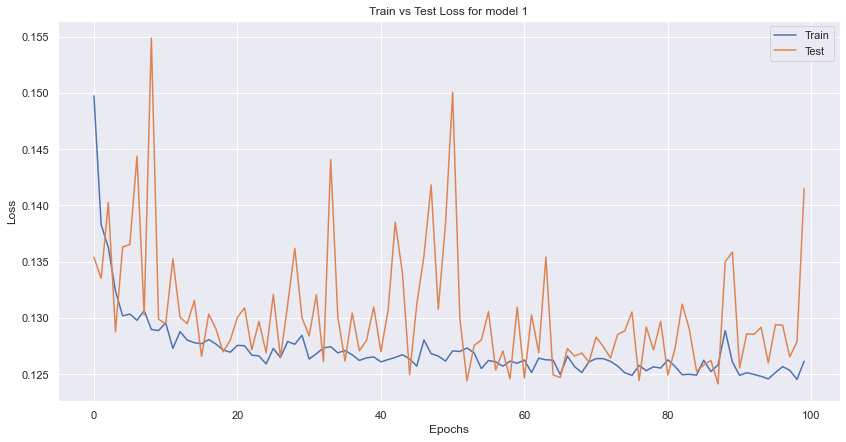

In [37]:

plt.plot(histmodel.history['loss'])
plt.plot(histmodel.history['val_loss'])
plt.title('Train vs Test Loss for model 1')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

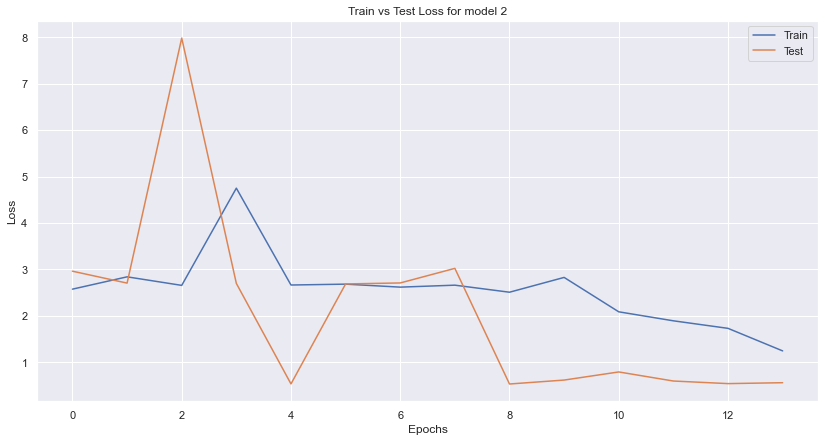

In [38]:

plt.plot(historym1.history['loss'])
plt.plot(historym1.history['val_loss'])
plt.title('Train vs Test Loss for model 2')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

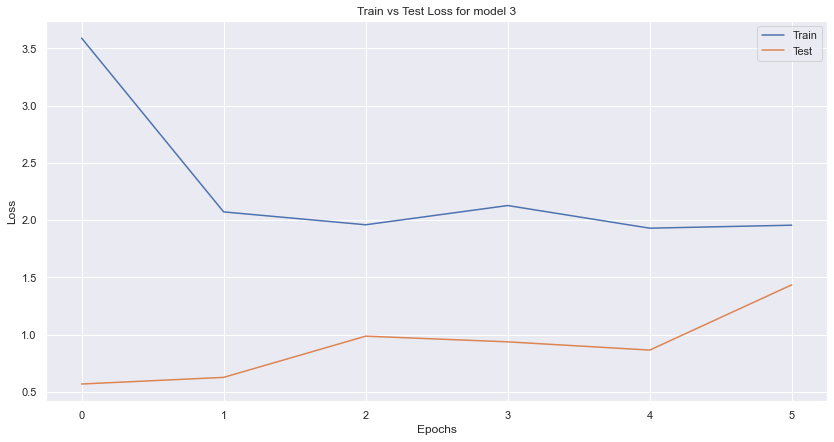

In [39]:

plt.plot(histmodel2.history['loss'])
plt.plot(histmodel2.history['val_loss'])
plt.title('Train vs Test Loss for model 3')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

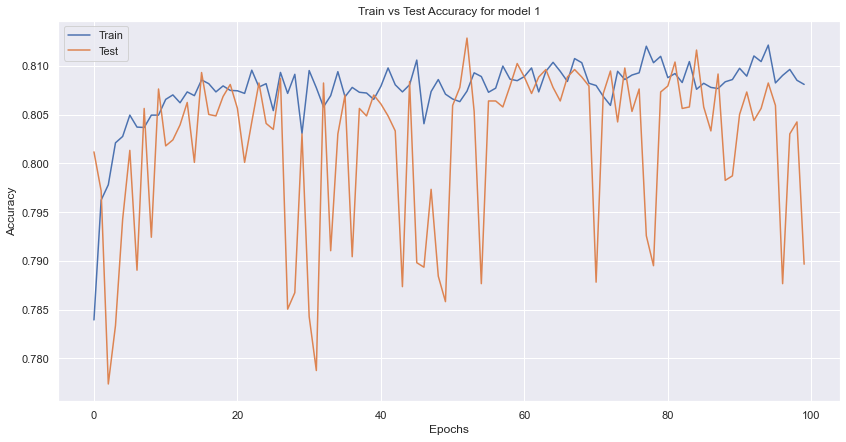

In [40]:

plt.plot(histmodel.history['accuracy'])
plt.plot(histmodel.history['val_accuracy'])
plt.title('Train vs Test Accuracy for model 1')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

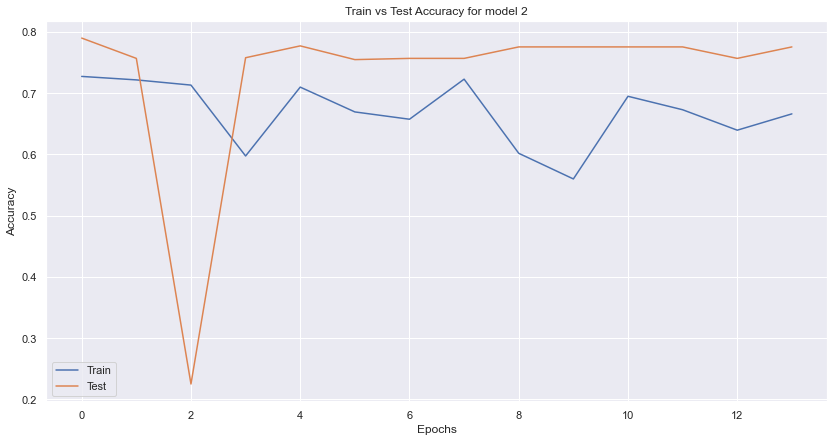

In [41]:

plt.plot(historym1.history['accuracy'])
plt.plot(historym1.history['val_accuracy'])
plt.title('Train vs Test Accuracy for model 2')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

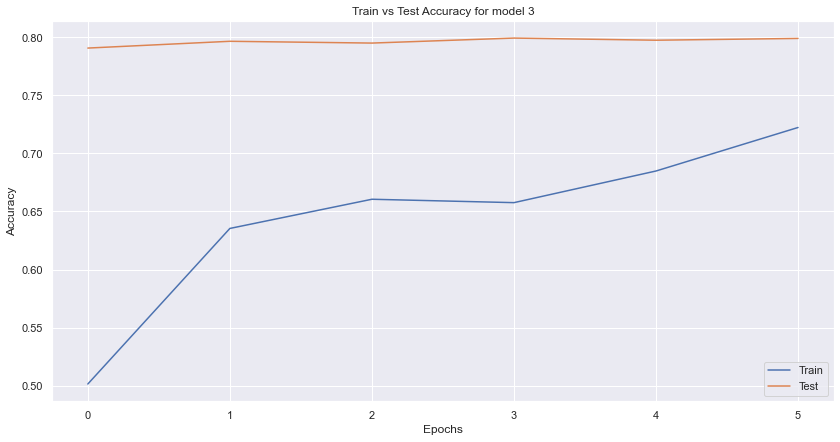

In [42]:

plt.plot(histmodel2.history['accuracy'])
plt.plot(histmodel2.history['val_accuracy'])
plt.title('Train vs Test Accuracy for model 3')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()